In [1]:
import pandas as pd
#import modin.pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

                                            Sommaire notebook
                                            
                                            
                                   1-Mission3       
                                     1.1Création des classes parents 
                                   2-Mission 4
                                     2.1 ANOVA sans log 
                                     2.2 ANOVA avec log 
                                     2.3 ANOVA backward
                                   3-Regression multiple
                                     3.1 Modele version 1(avec les log) 
                                     3.2 Modele version 2(sans les log )
                                     3.3 Améliorez le modèle(avec la classe de revenu des parents) 
                                     3.4 Modèle reg_multiple Analyses des valeurs atypiques et influentes
                                      
                                      
                                            

# 1-Mission 3

### 1.1 Création des classes parents

In [86]:
#Importer fichier avec les clones
df_final1 = pd.read_csv('df2_final_P7.csv')
# Dimensions df_final1
print(df_final1.shape)
df_final1.head()

(5750000, 11)


,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,values_pop,values_gini,log_value_income,coeff_elastique
0,ALB,2008,1,100,728.89795,7297.0,Albanie,2947314.0,30.0,6.591534,0.4
1,ALB,2008,2,100,916.66235,7297.0,Albanie,2947314.0,30.0,6.820739,0.4
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,2947314.0,30.0,6.918612,0.4
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,2947314.0,30.0,6.991092,0.4
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,2947314.0,30.0,7.032359,0.4


In [87]:
# importer ficher proba conditionnelle
df_proba_cond = pd.read_csv('DF2_Proba_cond_P7.csv')
# Dimensions df_proba_cond
print(df_proba_cond.shape)
df_proba_cond.head()

(40000, 4)


,coeff_elastique,c_enfants,c_parents,proba_cond
0,0.2,1,1,0.034
1,0.2,2,1,0.036
2,0.2,3,1,0.018
3,0.2,4,1,0.022
4,0.2,5,1,0.019


In [88]:
#Voir les pj pour chaque pays 
coef_df = df_final1[["Country Code","coeff_elastique"]].drop_duplicates().reset_index()[["Country Code","coeff_elastique"]]
#Dimensions coef_df
print(coef_df.shape)
coef_df.head()

(115, 2)


,Country Code,coeff_elastique
0,ALB,0.40
1,ARG,0.66
2,ARM,0.50
3,AUT,0.40
4,AZE,0.50


In [89]:
#Boucle pour créer les classes parents
c_parents = [] # liste vide pour accueillir les classes parents 

for i in range(115):
    coef = coef_df['coeff_elastique'][i] # i = chaque pj pour chaque pays
    for child in range(1,101):# Pour chaque quantiles enfants de 1 à 100
        sm = 0
        for parent in range(1,101): # Pour chaque quantile enfants de 1 à 100
            proba = df_proba_cond[(df_proba_cond["coeff_elastique"]==coef) & #pour chaque coef pour chaque pays
                                  (df_proba_cond["c_enfants"]==child) & # pour chaque quantile enfant de 1 à 100
                                  (df_proba_cond["c_parents"]==parent)]["proba_cond"].values[0]
                                    #pour chaque quantile parents #de 1 à 100 et la valeur de proba
                                                                                            
            if parent == 100: #si parents = 100
                parent_list = [parent]*(500-sm) # parent_list = 50 000 
                c_parents = c_parents+parent_list # c_parents = (50 000 classes pour chaque pays )
            else: # sinon si parent pas != 100 
                parent_list = [parent]*int(500*proba) #pour ne pas avoir classes décimales 
                sm = sm + int(500*proba)
                c_parents = c_parents+parent_list
            
    print(i) # print chaque index pays 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


In [1]:
#voir le nombre classes parents
len(c_parents)

NameError: name 'c_parents' is not defined

In [ ]:
#voir le nombre de pays dans le df_final2
len(df_final1["Country Code"].unique())

In [ ]:
#création dataframe pour c_parents
Classe_parents = pd.DataFrame(c_parents)

#concat le df_final1 et df classes_parents
df_M4 = pd.concat([df_final1,Classe_parents], axis=1)
df_M4= df_M4.rename(columns={0:'C_i_parent'})
df_M4.head()

In [ ]:
#Sélectionner les colonnes 
DF_M4 = df_M4.iloc[:,[0,6,1,2,11,3,4,9,8,10,7,5]]
DF_M4.head()

In [ ]:
# Renommer les colonnes 
DF_M4 = DF_M4.rename(columns={'Country Name':'Country_Name', 'Country Code':'Country_Code'})

In [ ]:
# sauvegarder DF_M4
DF_M4.to_csv("df_M4.csv", index = False)

# Mission 4


# 2.1 ANOVA sans log 

Pour cette mission 4, nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.

In [2]:
#importer le fichier pour la mission 4
DF_M4 = pd.read_csv('df_M4.csv')
print(DF_M4.shape)
print(DF_M4['Country_Name'].nunique())
DF_M4.head()

(5750000, 12)
115


,Country_Code,Country_Name,year_survey,quantile,C_i_parent,nb_quantiles,income,log_value_income,values_gini,coeff_elastique,values_pop,gdpppp
0,ALB,Albanie,2008,1,1,100,728.89795,6.591534,30.0,0.4,2947314.0,7297.0
1,ALB,Albanie,2008,2,1,100,916.66235,6.820739,30.0,0.4,2947314.0,7297.0
2,ALB,Albanie,2008,3,1,100,1010.91600,6.918612,30.0,0.4,2947314.0,7297.0
3,ALB,Albanie,2008,4,1,100,1086.90780,6.991092,30.0,0.4,2947314.0,7297.0
4,ALB,Albanie,2008,5,1,100,1132.69970,7.032359,30.0,0.4,2947314.0,7297.0


In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#copy 
df_ANOVA= DF_M4.copy()
#ANOVA avec income (variable expliquée) et Country_Name(variable explicative)
mod_anova = ols('income~Country_Name',data=df_ANOVA).fit()
#afficher le summary                
print(mod_anova.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 4.986e+04
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:49:04   Log-Likelihood:            -5.8752e+07
No. Observations:             5750000   AIC:                         1.175e+08
Df Residuals:                 5749885   BIC:                         1.175e+08
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [4]:
aov_table = sm.stats.anova_lm(mod_anova, typ=2)
print(aov_table)

                    sum_sq         df             F  PR(>F)
Country_Name  2.496311e+14      114.0  49864.237854     0.0
Residual      2.525014e+14  5749885.0           NaN     NaN


# 2.2 ANOVA avec log 

In [5]:
#ANOVA avec income log (variable expliquée) et Country_Name(variable explicative)

mod = ols('log_value_income~Country_Name',data=df_ANOVA).fit()
# afficher le summary du modèle                
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       log_value_income   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.340e+05
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:21:12   Log-Likelihood:            -6.2697e+06
No. Observations:             5750000   AIC:                         1.254e+07
Df Residuals:                 5749885   BIC:                         1.254e+07
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

# 2.3 ANOVA backward

In [140]:
# supprimer Venezuela car p value (0.092) > seuil significativité alpha 5%
ANOVA_backward1 = df_ANOVA[df_ANOVA['Country_Name']!='Venezuela']

#ANOVA avec income log (variable expliquée) et Country_Name(variable explicative)

mod2 = ols('log_value_income~Country_Name',data=ANOVA_backward1).fit()
# afficher le summary du modèle                
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:       log_value_income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.356e+05
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:01:30   Log-Likelihood:            -6.2078e+06
No. Observations:             5700000   AIC:                         1.242e+07
Df Residuals:                 5699886   BIC:                         1.242e+07
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

# 3 Regression multiple

In [124]:
#importer le fichier pour la mission 4
DF_M4 = pd.read_csv('df_M4.csv')
#Vérifier les pays uniques 
print(DF_M4['Country_Name'].nunique())
#dimensions DF_M4
print(DF_M4.shape)
DF_M4.head()

115
(5750000, 12)


,Country_Code,Country_Name,year_survey,quantile,C_i_parent,nb_quantiles,income,log_value_income,values_gini,coeff_elastique,values_pop,gdpppp
0,ALB,Albanie,2008,1,1,100,728.89795,6.591534,30.0,0.4,2947314.0,7297.0
1,ALB,Albanie,2008,2,1,100,916.66235,6.820739,30.0,0.4,2947314.0,7297.0
2,ALB,Albanie,2008,3,1,100,1010.91600,6.918612,30.0,0.4,2947314.0,7297.0
3,ALB,Albanie,2008,4,1,100,1086.90780,6.991092,30.0,0.4,2947314.0,7297.0
4,ALB,Albanie,2008,5,1,100,1132.69970,7.032359,30.0,0.4,2947314.0,7297.0


In [125]:
# Création colonne revenus moyens des pays 
df_revenus_moyen_pays = DF_M4.groupby(by="Country_Name").mean()
df_revenus_moyen_pays = df_revenus_moyen_pays.reset_index()


# Séléctionner le revenu moyen du pays (income) et le pays 
df_revenus_moyen_pays1 = df_revenus_moyen_pays[['Country_Name','income']].reset_index()
# renomer colonne income en income moyen
df_revenus_moyen_pays1 = df_revenus_moyen_pays1.rename(columns={'income':'income_moyen'})
df_revenus_moyen_pays1.drop(columns='index', inplace=True )
print(df_revenus_moyen_pays1.shape)
df_revenus_moyen_pays1.sample(5)


(115, 2)


,Country_Name,income_moyen
52,Italie,14925.214922
113,Équateur,3383.741001
114,États-Unis,25503.581661
47,"Iran, République islamique d’",5832.655501
5,Autriche,16637.600204


In [126]:
#selectionner les pays et ces values Gini
df_gini = DF_M4[['Country_Name','values_gini']]
df_gini.head()

,Country_Name,values_gini
0,Albanie,30.0
1,Albanie,30.0
2,Albanie,30.0
3,Albanie,30.0
4,Albanie,30.0


In [127]:
# merge entre df_gini et le df_revenu moyen pays
df_regression1 = df_gini.merge(df_revenus_moyen_pays1, how='left', on='Country_Name')
# dimensions de df_regression1
print(df_regression1.shape)
df_regression1.head()


(5750000, 3)


,Country_Name,values_gini,income_moyen
0,Albanie,30.0,2994.829902
1,Albanie,30.0,2994.829902
2,Albanie,30.0,2994.829902
3,Albanie,30.0,2994.829902
4,Albanie,30.0,2994.829902


In [128]:
# Transormation log variable income  
df_regression1['log_value_income_moyen'] = np.log(df_regression1['income_moyen'])

In [129]:
#Séletionner les colonnes 'Country_Name','income','log_value_income','C_i_parent'
df2_regression1 = DF_M4[['income','log_value_income','C_i_parent' ]]
df2_regression1.head()

,income,log_value_income,C_i_parent
0,728.89795,6.591534,1
1,916.66235,6.820739,1
2,1010.91600,6.918612,1
3,1086.90780,6.991092,1
4,1132.69970,7.032359,1


In [130]:
# voir tete du df et concaténations entre df_regression1, df2_regression1
df_regression1_final = pd.concat([df_regression1, df2_regression1], axis=1)
df_regression1_final.head()

,Country_Name,values_gini,income_moyen,log_value_income_moyen,income,log_value_income,C_i_parent
0,Albanie,30.0,2994.829902,8.004643,728.89795,6.591534,1
1,Albanie,30.0,2994.829902,8.004643,916.66235,6.820739,1
2,Albanie,30.0,2994.829902,8.004643,1010.91600,6.918612,1
3,Albanie,30.0,2994.829902,8.004643,1086.90780,6.991092,1
4,Albanie,30.0,2994.829902,8.004643,1132.69970,7.032359,1


In [131]:
#Création df_geo pour la carte du monde 
df_geo = df_revenus_moyen_pays1.merge(DF_M4[['Country_Name','Country_Code']], how='left', on='Country_Name').drop_duplicates().reset_index()

In [132]:
# vérifier le revenu moyen de la france 
df_geo[df_geo['Country_Name']=='France']

,index,Country_Name,income_moyen,Country_Code
36,1800000,France,18309.407545,FRA


In [141]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly
#les revenus moyens des pays dans le monde

df_geo = df_revenus_moyen_pays1.merge(DF_M4[['Country_Name','Country_Code']], how='left', on='Country_Name').drop_duplicates().reset_index()

# carte du monde pour visualiser les pj des pays 
data = dict(
        type = 'choropleth',
        locations = df_geo['Country_Code'],
        z = df_geo['income_moyen'],
        text = df_geo['Country_Name'],
        colorbar = {'title' : 'income moyen pays'},
      ) 


layout = dict(
    title = "Les revenus moyens des pays dans le monde",
    geo = dict(
        showframe = False,
        #projection = {'type':'Mercator'}
    )
)


choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# 3.1 Modele version 1(avec les log) 

#variable expliquée le log revenu des individus (revenu des enfants sachant classe ces parents en log)
#Variable explicatives log_value_income(revenu moyen du pays de l'individu en log)et value gini

In [134]:
#importer les packages nécessaires pour modéliser 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from statsmodels.formula.api import ols

In [136]:
# voir tete de df_regression1_final
df_regression1_final.head()

,Country_Name,values_gini,income_moyen,log_value_income_moyen,income,log_value_income,C_i_parent
0,Albanie,30.0,2994.829902,8.004643,728.89795,6.591534,1
1,Albanie,30.0,2994.829902,8.004643,916.66235,6.820739,1
2,Albanie,30.0,2994.829902,8.004643,1010.91600,6.918612,1
3,Albanie,30.0,2994.829902,8.004643,1086.90780,6.991092,1
4,Albanie,30.0,2994.829902,8.004643,1132.69970,7.032359,1


In [137]:
#version 1 régression Multiples avec log_value_income~log_value_income_moyen+values_gini
reg_multi = smf.ols('log_value_income~log_value_income_moyen+values_gini', data=df_regression1_final).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       log_value_income   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 7.597e+06
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:28:44   Log-Likelihood:            -6.2815e+06
No. Observations:             5750000   AIC:                         1.256e+07
Df Residuals:                 5749997   BIC:                         1.256e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

# 3.2 Modele version 2 (sans les log ) 

In [138]:
#Le modéle version 2 est moins bon sans les log 

reg_multi = smf.ols('income~income_moyen+values_gini', data=df_regression1_final).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 2.842e+06
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:28:53   Log-Likelihood:            -5.8752e+07
No. Observations:             5750000   AIC:                         1.175e+08
Df Residuals:                 5749997   BIC:                         1.175e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.302e-11     14.783  -4.94e-12   

<AxesSubplot:title={'center':'Les corrélations entre les variables'}>

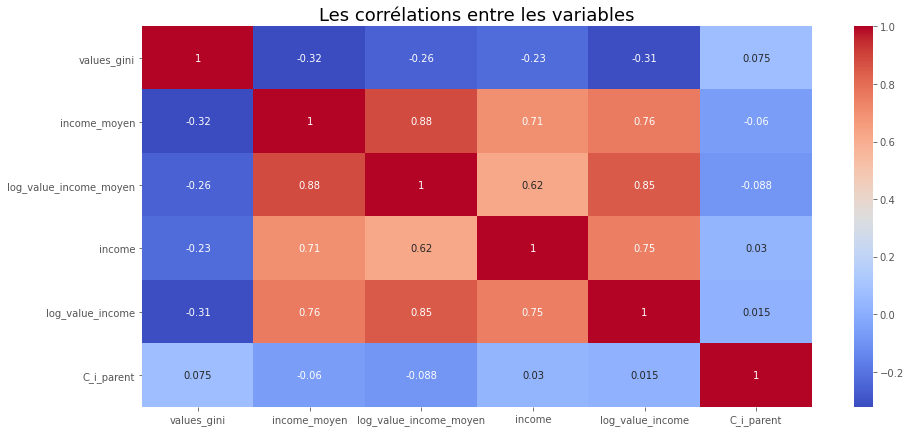

In [139]:
#Voir les corrélations entre variables
plt.subplots(figsize=(15,7))
plt.title('Les corrélations entre les variables', size=18)
sns.heatmap(df_regression1_final.corr(), annot = True, cmap='coolwarm')

# 3.3  Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?

In [71]:
#la version avec C_i_parents et les log
reg_multi = smf.ols('log_value_income~log_value_income_moyen+values_gini+C_i_parent', data=df_regression1_final).fit()
print(reg_multi.summary())


                            OLS Regression Results                            
Dep. Variable:       log_value_income   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                 5.306e+06
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:15:41   Log-Likelihood:            -6.1838e+06
No. Observations:             5750000   AIC:                         1.237e+07
Df Residuals:                 5749996   BIC:                         1.237e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

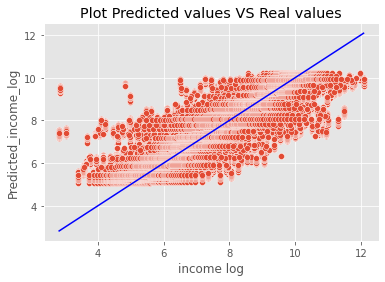

In [118]:
# Plot Predicted values VS Real values
plt.style.use('ggplot')
df_regression1_final['Predicted_log_value_income'] = reg_multi.predict()
X_plot = [df_regression1_final['log_value_income'].min(), df_regression1_final['log_value_income'].max()]
ax = sns.scatterplot(x="log_value_income", y="Predicted_log_value_income", data=df_regression1_final)
ax.set(xlabel='income log', ylabel='Predicted_income_log', title='Plot Predicted values VS Real values')
plt.plot(X_plot, X_plot, color='b')
plt.show()

In [73]:
# Vérifier si il y colinéarité entre les variables explicatives
variables = reg_multi.model.exog
print([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])])
print("il n'y a pas de multicolinéarité entre les variables explicatives du modéle")

[1.0761199348856707, 1.0738251189619235, 1.010806313125886]
il n'y a pas de multicolinéarité entre les variables explicatives du modéle


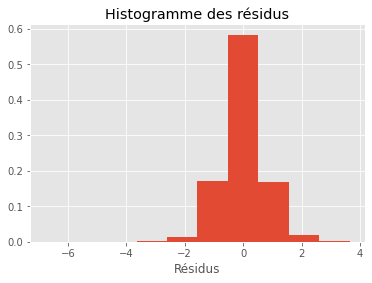

In [119]:
# Histogramme des résidus
import matplotlib.pyplot as plt
import seaborn as sns 
df_regression1_final['residu_s'] = reg_multi.resid
plt.hist(df_regression1_final['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Histogramme des résidus (Modèle final)'}, xlabel='residu_s'>

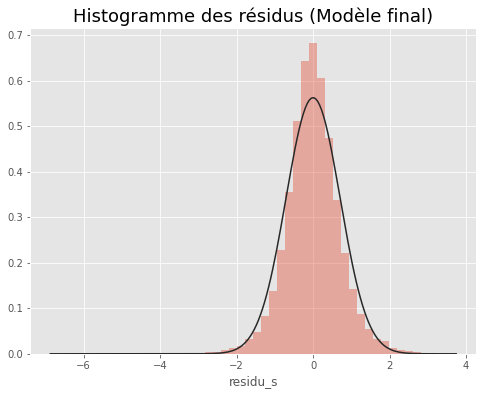

In [120]:
from scipy.stats import norm
#voir histogramme des residus 

plt.figure(figsize=(8,6))
plt.title('Histogramme des résidus (Modèle final)', size=18)
sns.distplot(df_regression1_final['residu_s'], fit=norm, kde=False)

In [76]:

# Vérifier si les résidus sont distribués normalement avec D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = df_regression1_final['residu_s'].values
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La distribution des residus du modèle est probablemement gaussien')
else:
    print("la distribution des résidus n'est probablemement pas gaussien")

stat=387931.100, p=0.000
la distribution des résidus n'est probablemement pas gaussien


In [77]:
# Vérifier si les résidus sont distribués normalement avec Anderson-Darling Normality Test
from scipy.stats import anderson
data = df_regression1_final['residu_s'].values
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('la distribution des residus du modèle est probablemement gaussien  %.1f%% level' % (sl))
    else:
            print(" la distribution des résidus n'est probablemement pas gaussien%.1f%% level" % (sl))

stat=22020.725
 la distribution des résidus n'est probablemement pas gaussien15.0% level
 la distribution des résidus n'est probablemement pas gaussien10.0% level
 la distribution des résidus n'est probablemement pas gaussien5.0% level
 la distribution des résidus n'est probablemement pas gaussien2.5% level
 la distribution des résidus n'est probablemement pas gaussien1.0% level


In [78]:
#Vérifier si les résidus sont distribués normalement avec shapiro
from scipy.stats import shapiro
import scipy.stats
data = df_regression1_final['residu_s'].values
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("la distribution des residus du modèle est probablemement gaussien")
else:
    print("la distribution des résidus n'est probablemement pas gaussien")

stat=0.976, p=0.000
la distribution des résidus n'est probablemement pas gaussien


/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



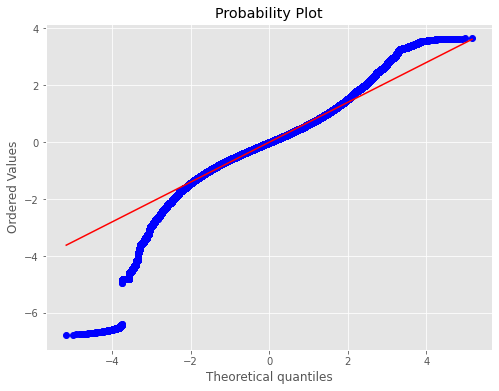

In [79]:
import scipy as sp
#QQPLOT
fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(data, plot=ax, fit=True)

In [80]:
# Vérifier si il y homoscédaticité dans le modèle 
#Hypothèse H0 rejeter ,l'hétéroscédasticité est présente (les résidus ne sont pas distribués avec une variance égale)
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


In [81]:
#prédiction du revenu des individus en log avec en définisant les variables
a_prevoir = pd.DataFrame({'log_value_income_moyen':8.004643, 'values_gini':30.0, 'C_i_parent': 1}, index=[0])
log_income_prev = reg_multi.predict(a_prevoir)
print(round(log_income_prev[0], 2))

7.65


# En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?


# 3.4 Modèle reg_multiple Analyses des valeurs atypiques et influentes

### Calculez les leviers

In [82]:
# réaliser les tests à un niveau  𝛼=5 % 
alpha = 0.05
#n le nombre d'individus de l'échantillon
n = df_regression1_final.shape[0]
#p le nombre de variables.
p = 4
#Création df des observations
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
analyses.head()

,obs
0,1
1,2
2,3
3,4
4,5


In [83]:
#concaténations entre les observations et les colonnes de df_regression1_final
analyses = pd.concat([analyses, df_regression1_final[['Country_Name', 'log_value_income','income','income_moyen','log_value_income_moyen','values_gini','C_i_parent' ]]], axis=1).set_index('Country_Name')
print(analyses.shape)
analyses.head()

(5750000, 7)


,obs,log_value_income,income,income_moyen,log_value_income_moyen,values_gini,C_i_parent
Country_Name,,,,,,,
Albanie,1,6.591534,728.89795,2994.829902,8.004643,30.0,1
Albanie,2,6.820739,916.66235,2994.829902,8.004643,30.0,1
Albanie,3,6.918612,1010.91600,2994.829902,8.004643,30.0,1
Albanie,4,6.991092,1086.90780,2994.829902,8.004643,30.0,1
Albanie,5,7.032359,1132.69970,2994.829902,8.004643,30.0,1


In [84]:
#Création colonne levier (atypicité)
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag
# calculer seuil levier (variables explicative)
seuil_levier = 2*p/n

### Calculez les résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [85]:

# Création colonne rstudent (variable expliquée, atypicité)
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
#Calculer seuil residus studentisés
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [86]:
#Voir la tete du df analyses
analyses.head()

,obs,log_value_income,income,income_moyen,log_value_income_moyen,values_gini,C_i_parent,levier,rstudent
Country_Name,,,,,,,,,
Albanie,1,6.591534,728.89795,2994.829902,8.004643,30.0,1,8.464855e-07,-1.493530
Albanie,2,6.820739,916.66235,2994.829902,8.004643,30.0,1,8.464855e-07,-1.170380
Albanie,3,6.918612,1010.91600,2994.829902,8.004643,30.0,1,8.464855e-07,-1.032392
Albanie,4,6.991092,1086.90780,2994.829902,8.004643,30.0,1,8.464855e-07,-0.930204
Albanie,5,7.032359,1132.69970,2994.829902,8.004643,30.0,1,8.464855e-07,-0.872023


In [87]:
#Afficher les valeurs des seuils residus studentisés
print(seuil_rstudent)
print(-seuil_rstudent)
seuil_rstudent_negative = - seuil_rstudent
seuil_rstudent_negative

1.9599643971094074
-1.9599643971094074


-1.9599643971094074

### La distance de cook 

In [88]:
#trouver la distance de Cook
influence = reg_multi.get_influence()
#le seuil de la distance de Cook est de n-p
seuils_dcook = 4/(n-p)
#trouver la distance de Cook
cooks = influence.cooks_distance
analyses['cook'] = cooks[0]
# le seuil dcook
print(seuils_dcook)

6.956526578453272e-07


In [89]:
# voir les observations Inférieure au seuil dcook
reg_cook_influence = analyses[analyses['cook'] < seuils_dcook]
reg_cook_influence = reg_cook_influence.reset_index()
print(reg_cook_influence.shape)
reg_cook_influence.head()

(5432593, 11)


,Country_Name,obs,log_value_income,income,income_moyen,log_value_income_moyen,values_gini,C_i_parent,levier,rstudent,cook
0,Albanie,1,6.591534,728.89795,2994.829902,8.004643,30.0,1,8.464855e-07,-1.493530,4.720498e-07
1,Albanie,2,6.820739,916.66235,2994.829902,8.004643,30.0,1,8.464855e-07,-1.170380,2.898770e-07
2,Albanie,3,6.918612,1010.91600,2994.829902,8.004643,30.0,1,8.464855e-07,-1.032392,2.255532e-07
3,Albanie,4,6.991092,1086.90780,2994.829902,8.004643,30.0,1,8.464855e-07,-0.930204,1.831120e-07
4,Albanie,5,7.032359,1132.69970,2994.829902,8.004643,30.0,1,8.464855e-07,-0.872023,1.609222e-07


In [90]:
#afficher tout les seuils pour atypicité et influence 
print(seuil_levier)
print(seuil_rstudent)
print(seuil_rstudent_negative)
print(seuils_dcook)

1.391304347826087e-06
1.9599643971094074
-1.9599643971094074
6.956526578453272e-07


In [91]:
#Conserver les observations entre seuil positif et négatif (rstudent)
#conserver les observations sous le seuil dcook
#conserver les observations sous le seuil levier 


reg_atyp_influence = analyses[((analyses['rstudent'] < seuil_rstudent)|(analyses['rstudent'] > seuil_rstudent_negative))
             &(analyses['levier']<seuil_levier)&(analyses['cook'] < seuils_dcook)]




# voir les dimensions aprés avoir retirer les observations atypiques et influentes pour le modèle
print(reg_atyp_influence.shape)
reg_atyp_influence.sort_values(by='levier',ascending=True).head()


(5342082, 10)


,obs,log_value_income,income,income_moyen,log_value_income_moyen,values_gini,C_i_parent,levier,rstudent,cook
Country_Name,,,,,,,,,,
Roumanie,4252404,6.278211,532.83435,3318.337189,8.107219,36.4,53,1.796317e-07,-2.238318,2.249919e-07
Roumanie,951934,7.613318,2024.98570,3318.337189,8.107219,36.4,53,1.796317e-07,-0.355990,5.691138e-09
Roumanie,2354901,5.297168,199.77019,3318.337189,8.107219,36.4,53,1.796317e-07,-3.621462,5.889670e-07
Roumanie,1400471,8.274067,3920.86470,3318.337189,8.107219,36.4,53,1.796317e-07,0.575581,1.487771e-08
Roumanie,3654401,5.297168,199.77019,3318.337189,8.107219,36.4,53,1.796317e-07,-3.621462,5.889670e-07


In [92]:
#Les observations supprimées avec Atypicités et influentes  
(5342082-5750000)*100

-40791800

In [93]:
reg_atyp_influence.head()

,obs,log_value_income,income,income_moyen,log_value_income_moyen,values_gini,C_i_parent,levier,rstudent,cook
Country_Name,,,,,,,,,,
Albanie,1,6.591534,728.89795,2994.829902,8.004643,30.0,1,8.464855e-07,-1.493530,4.720498e-07
Albanie,2,6.820739,916.66235,2994.829902,8.004643,30.0,1,8.464855e-07,-1.170380,2.898770e-07
Albanie,3,6.918612,1010.91600,2994.829902,8.004643,30.0,1,8.464855e-07,-1.032392,2.255532e-07
Albanie,4,6.991092,1086.90780,2994.829902,8.004643,30.0,1,8.464855e-07,-0.930204,1.831120e-07
Albanie,5,7.032359,1132.69970,2994.829902,8.004643,30.0,1,8.464855e-07,-0.872023,1.609222e-07


In [122]:
# regression multiple sans les valeurs atypiques et infleuntes 
reg_multi_no_influence = smf.ols('log_value_income~log_value_income_moyen+values_gini+C_i_parent', data=reg_atyp_influence).fit()
print(reg_multi_no_influence.summary())

                            OLS Regression Results                            
Dep. Variable:       log_value_income   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 7.848e+06
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:26:07   Log-Likelihood:            -4.5942e+06
No. Observations:             5342082   AIC:                         9.188e+06
Df Residuals:                 5342078   BIC:                         9.188e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

<AxesSubplot:title={'center':'Les corrélations entre les variables'}>

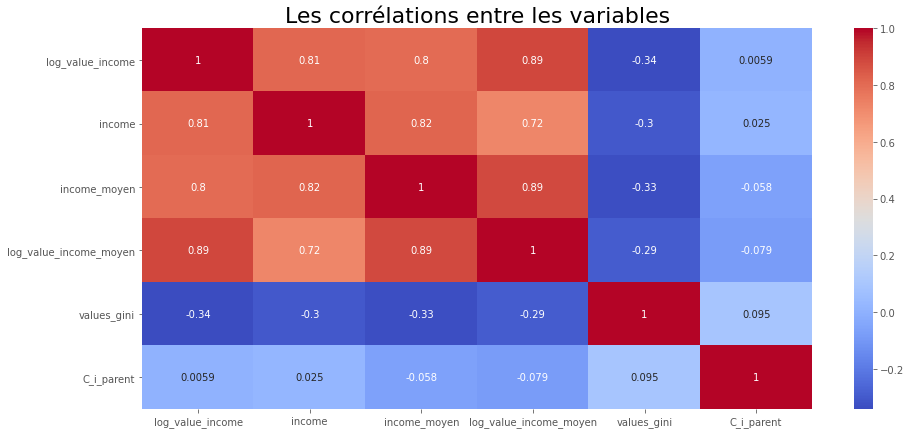

In [123]:
#Voir les corrélations entre variables
reg_atyp_influence_corr =reg_atyp_influence.iloc[:,[1,2,3,4,5,6]]
plt.subplots(figsize=(15,7))
plt.title('Les corrélations entre les variables', size=22)
sns.heatmap(reg_atyp_influence_corr.corr(), annot = True, cmap='coolwarm')

In [102]:
#vérifier si il y a colinéarité entre les variables explicatives 
variables = reg_multi_no_influence.model.exog
print([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])])
print("il n'y a pas de multicolinéarité entre les variables explicatives du modéle")

[1.094510702394315, 1.0975633514647887, 1.012124534476158]
il n'y a pas de multicolinéarité entre les variables explicatives du modéle


In [103]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms 

#Vérifier si il y a homoscédasticité 
names = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value'] 
test = sms.het_breuschpagan (reg_multi_no_influence.resid, reg_multi_no_influence.model.exog) 
lzip (names, test) 

[('Lagrange multiplier statistic', 161304.05196683772),
 ('p-value', 0.0),
 ('f-value', 55442.04853443157),
 ('f p-value', 0.0)]

In [104]:
#Création colonne residus 
reg_atyp_influence['residu_s'] = reg_multi_no_influence.resid

/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



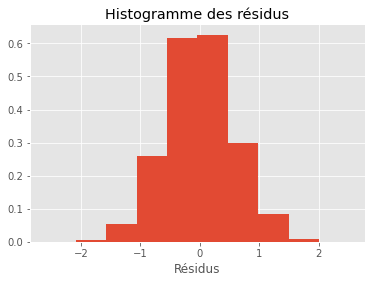

In [105]:
#voir histogramme des residus 
plt.hist(reg_atyp_influence['residu_s'], density=True)
#sns.distplot(df_regression1_final['residu_s'], norm_hist=True, color='red')
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Histogramme des résidus'}, xlabel='residu_s'>

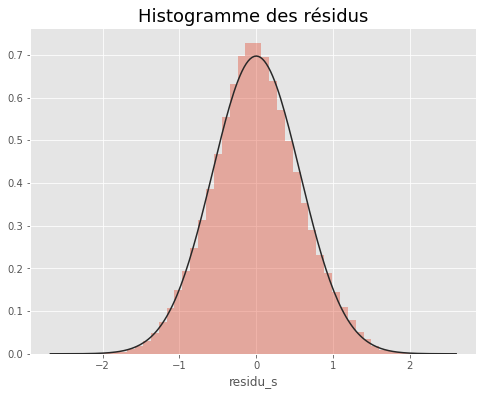

In [106]:
from scipy.stats import norm
#voir histogramme des residus 

plt.figure(figsize=(8,6))
plt.title('Histogramme des résidus', size=18)
sns.distplot(reg_atyp_influence['residu_s'], fit=norm, kde=False)

In [107]:
# Vérifier si les résidus sont distribués normalement avec D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = reg_atyp_influence['residu_s'].values
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La distribution des residus du modèle est probablemement gaussien')
else:
    print("la distribution des résidus n'est probablemement pas gaussien")

stat=2607.299, p=0.000
la distribution des résidus n'est probablemement pas gaussien


In [108]:
# Vérifier si les résidus sont distribués normalement avec Anderson-Darling Normality Test
from scipy.stats import anderson
data = reg_atyp_influence['residu_s'].values
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('la distribution des residus du modèle est probablemement gaussien  %.1f%% level' % (sl))
    else:
            print(" la distribution des résidus n'est probablemement pas gaussien%.1f%% level" % (sl))

stat=977.041
 la distribution des résidus n'est probablemement pas gaussien15.0% level
 la distribution des résidus n'est probablemement pas gaussien10.0% level
 la distribution des résidus n'est probablemement pas gaussien5.0% level
 la distribution des résidus n'est probablemement pas gaussien2.5% level
 la distribution des résidus n'est probablemement pas gaussien1.0% level


In [109]:
#Vérifier si les résidus sont distribués normalement avec shapiro
from scipy.stats import shapiro
import scipy.stats
data = reg_atyp_influence['residu_s'].values
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("la distribution des residus du modèle est probablemement gaussien")
else:
    print("la distribution des résidus n'est probablemement pas gaussien")

stat=1.000, p=0.000
la distribution des résidus n'est probablemement pas gaussien


/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



In [110]:
#Vérifier si il yd a homoscédasticité ( il y a hétéroscédasticité )
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_no_influence.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


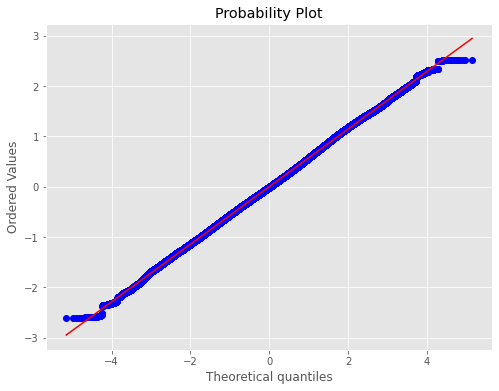

In [111]:
import scipy as sp
#QQPLOT du modèle sans les observations atypiques et influentes 
fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(data, plot=ax, fit=True)

In [112]:
#sauvegarder reg_atyp_influence
reg_atyp_influence.head()
reg_atyp_influence.to_csv("reg_atyp_influence.csv", index = False)

In [113]:
reg_atyp_influence1=reg_atyp_influence.reset_index()
print(reg_atyp_influence1.shape)
reg_atyp_influence1.head()

(5342082, 12)


,Country_Name,obs,log_value_income,income,income_moyen,log_value_income_moyen,values_gini,C_i_parent,levier,rstudent,cook,residu_s
0,Albanie,1,6.591534,728.89795,2994.829902,8.004643,30.0,1,8.464855e-07,-1.493530,4.720498e-07,-1.080789
1,Albanie,2,6.820739,916.66235,2994.829902,8.004643,30.0,1,8.464855e-07,-1.170380,2.898770e-07,-0.851584
2,Albanie,3,6.918612,1010.91600,2994.829902,8.004643,30.0,1,8.464855e-07,-1.032392,2.255532e-07,-0.753711
3,Albanie,4,6.991092,1086.90780,2994.829902,8.004643,30.0,1,8.464855e-07,-0.930204,1.831120e-07,-0.681231
4,Albanie,5,7.032359,1132.69970,2994.829902,8.004643,30.0,1,8.464855e-07,-0.872023,1.609222e-07,-0.639964


In [114]:
# voir si il manque des classes parents 
# il y a des classes manquantes !!!!!
test = reg_atyp_influence1.groupby('Country_Name')['C_i_parent'].value_counts()

pd.set_option('display.max_rows', None)
test.head(1000)


Country_Name        C_i_parent
Albanie             1              2449
                    2              2340
                    4              2271
                    3              2260
                    5              2142
                    6              2043
                    7              2003
                    8              1929
                    9              1884
                    10             1812
                    11             1756
                    13             1623
                    12             1594
                    14             1515
                    15             1429
                    16             1326
                    17             1322
                    18             1239
                    19             1202
                    21             1052
                    20             1046
                    22              961
                    23              872
                    24              823
         

/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



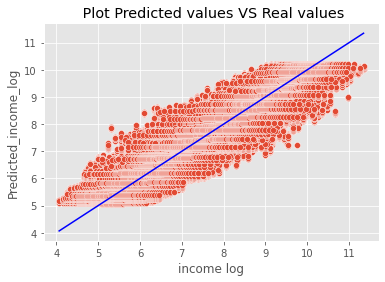

In [121]:
# Plot Predicted values VS Real values
reg_atyp_influence['Predicted_log_value_income'] = reg_multi_no_influence.predict()
X_plot = [reg_atyp_influence['log_value_income'].min(), reg_atyp_influence['log_value_income'].max()]
ax = sns.scatterplot(x="log_value_income", y="Predicted_log_value_income", data=reg_atyp_influence)
ax.set(xlabel='income log', ylabel='Predicted_income_log', title=' Plot Predicted values VS Real values')
#plt.title()
plt.plot(X_plot, X_plot, color='b')
plt.show()